Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Figure 6.6

Analysis of height and handedness data, which reveals that they are approximately independent\
Topics and relevant videos: [Joint distribution of discrete and continuous variables](https://www.youtube.com/watch?v=DQxf2t_OM-8), [independence](https://www.youtube.com/watch?v=gJNArEm5U_A), [kernel density estimation](https://www.youtube.com/watch?v=TxB-rbrXMys)

Author: Carlos Fernandez-Granda\
Data source: http://mreed.umtri.umich.edu/mreed/downloads.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm
from scipy import stats

font_size = 15
font_size_legend = 15
font_size_ticks = 15

# data = pd.read_csv ("../data/ANSUR II MALE Public.csv", encoding='latin-1')

# Raw GitHub URLs
url_data = "https://raw.githubusercontent.com/cfgranda/ps4ds/main/data/ANSUR%20II%20MALE%20Public.csv"

# Load data with specified encoding
data = pd.read_csv(url_data, encoding='latin-1')

In [2]:
stature = data['stature'] / 10.
hand = data['WritingPreference'] 
print(hand.value_counts())

WritingPreference
Right hand                     3577
Left hand                       466
Either hand (No preference)      39
Name: count, dtype: int64


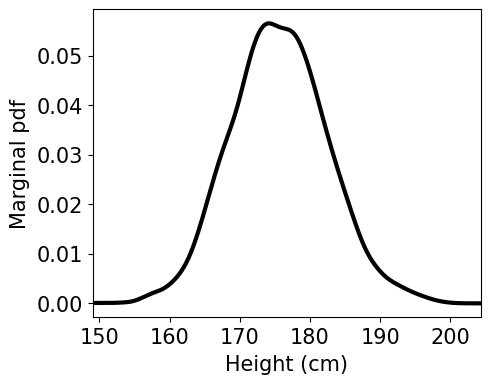

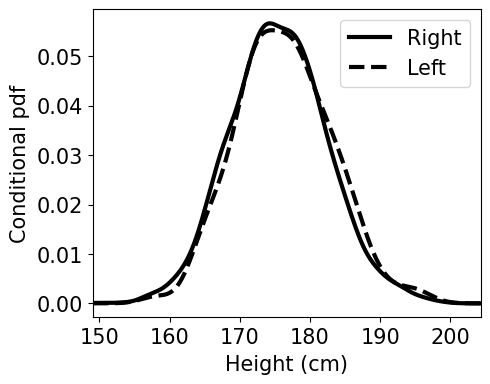

In [3]:
# We estimate the conditional pdf of height given handedness using kernel density estimation
def KDE_1D(data,x,bw=None):
    kernel = stats.gaussian_kde(data,bw_method=bw)
    kde = kernel(x)
    return kde

bw_vals = [0.2] 
bw_vals_1 = [0.3] # There is very little left-handed data so we use a larger bandwidth

hmin = stature.min()
hmax = stature.max() + 5
h = np.linspace(hmin,hmax,500)

for index,bw in enumerate(bw_vals):
    bw_1 = bw_vals_1[index]
    kde_height_left = KDE_1D(stature[hand=="Left hand"],h,bw=bw_1)
    kde_height_right = KDE_1D(stature[hand=="Right hand"],h,bw=bw)
    # We ignore people with no preference
    kde_height = KDE_1D(stature[(hand=="Left hand") | (hand=="Right hand")],h,bw=bw)
    
    plt.figure(figsize=(5,4))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.plot(h,kde_height,color="black",lw=3)
    plt.xlim([hmin,hmax])
    # plt.ylim([0,y_max])
    plt.ylabel(r"Marginal pdf",fontsize=font_size,labelpad=5)
    plt.xlabel('Height (cm)',fontsize=font_size,labelpad=5)
    
    plt.figure(figsize=(5,4))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.plot(h,kde_height_right,color="black",lw=3,label="Right")
    plt.plot(h,kde_height_left,color="black",lw=3,ls="dashed",label="Left")
    plt.xlim([hmin,hmax])
    #plt.ylim([0,y_max])
    plt.ylabel(r"Conditional pdf",fontsize=font_size,labelpad=5)
    plt.xlabel('Height (cm)',fontsize=font_size,labelpad=5)
    plt.legend(fontsize=font_size);

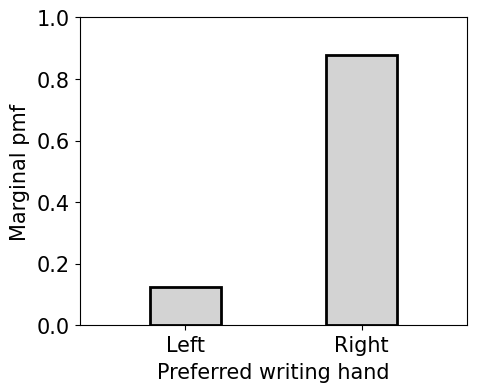

In [4]:
xmin = -0.6
xmax = 1.6
vals = [0,1]
ymax = 1
p_right = float(hand.value_counts()["Right hand"]) / float(len(hand))
marginal_pmf = [1-p_right,p_right]

plt.figure(figsize=(5,4))
plt.bar(vals,marginal_pmf, width = 0.4, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks([0,1],fontsize=font_size,labels = ["Left","Right"]) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Marginal pmf",fontsize=font_size,labelpad=5)
plt.xlabel('Preferred writing hand',fontsize=font_size,labelpad=5);

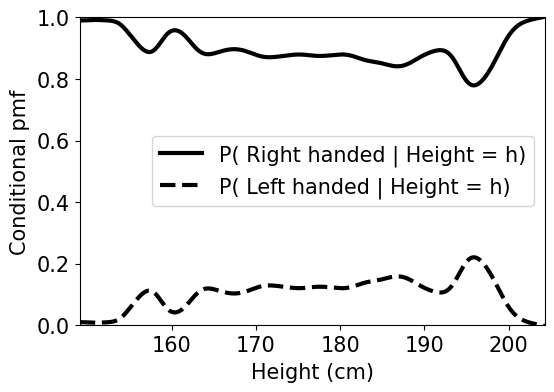

In [5]:
for index,bw in enumerate(bw_vals):
    bw_1 = bw_vals_1[index]
    kde_height = KDE_1D(stature[(hand=="Left hand") | (hand=="Right hand")],h,bw=bw)
    kde_height_left = KDE_1D(stature[hand=="Left hand"],h,bw=bw_1)
    kde_height_right = KDE_1D(stature[hand=="Right hand"],h,bw=bw)

    hand_given_height_right = kde_height_right * p_right / kde_height
    hand_given_height_left = 1-hand_given_height_right

    plt.figure(figsize=(6,4))
    plt.xticks(np.arange(160,210,10),fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    #sns.kdeplot(temperature_1,bw=bw,color="black",lw=3,gridsize=1000, legend = False)#,color='white', edgecolor='black',linewidth=2)
    plt.plot(h,hand_given_height_right,color="black",lw=3,label='P( Right handed | Height = h)')
    plt.plot(h,hand_given_height_left,color="black",lw=3,ls="dashed",label='P( Left handed | Height = h)')
    plt.xlim([hmin,hmax])
    # plt.ylim([-0.1,1.1])
    plt.ylim([0,ymax])
    plt.ylabel(r"Conditional pmf",fontsize=font_size,labelpad=5)
    plt.xlabel('Height (cm)',fontsize=font_size,labelpad=5)
    plt.legend(fontsize=font_size);